# Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from sklearn.metrics import cohen_kappa_score, f1_score
import seaborn as sns

In [64]:
sns.set_style("whitegrid")

# Pilot_All_HAnn - whole dataset

## Data upload

Annotator 1

In [65]:
reddit_bs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Reddit_s1_Annotator_1.xlsx')
tiktok_bs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Tiktok_s1_Annotator_1.xlsx')
twitter_bs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Twitter_s1_Annotator_1.xlsx')

Annotator 2

In [66]:
reddit_fs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Reddit_s1_Annotator_2.xlsx')
tiktok_fs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Tiktok_s1_Annotator_2.xlsx')
twitter_fs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Twitter_s1_Annotator_2.xlsx')

Annotator 3

In [67]:
reddit_ir = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Reddit_s1_Annotator_3.xlsx')
tiktok_ir = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Tiktok_s1_Annotator_3.xlsx')
twitter_ir = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Twitter_s1_Annotator_3.xlsx')

Annotator 4

In [68]:
reddit_lw = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Reddit_s1_Annotator_4.xlsx')
tiktok_lw = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Tiktok_s1_Annotator_4.xlsx')
twitter_lw = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Twitter_s1_Annotator_4.xlsx')

## Adding column with topic

In [7]:
reddit = [reddit_bs, reddit_fs, reddit_ir, reddit_lw]
twitter = [twitter_bs, twitter_fs, twitter_ir, twitter_lw]
tiktok = [tiktok_bs, tiktok_fs, tiktok_ir, tiktok_lw]

bias_columns = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']

def add_topic_reddit(df):
  df['topic'] = np.where(df.index < 600, 'climate', 'AI')

def add_topic_twitter(df):
  df['topic'] = np.where(df.index < 300, 'AI', 'climate')

def add_topic_tiktok(df):
  df['topic'] = np.where(df.index < 150, 'climate', 'AI')

for file in reddit:
  add_topic_reddit(file)

for file in twitter:
  add_topic_twitter(file)

for file in tiktok:
  add_topic_tiktok(file)

## Merging files into platform files

In [8]:
annotators = ["bs", "fs", "ir", "lw"]
bias_columns = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']

### Reddit

In [9]:
# Merging Reddit files
def merge_files_with_annotators(dataframes, annotators, bias_columns):
    merged_df = dataframes[0][['title', 'post_id', 'comment_id', 'text', 'topic']].copy()

    for df, annotator in zip(dataframes, annotators):
        annotated_cols = {col: f"{col}_{annotator}" for col in bias_columns}
        annotator_df = df[['title', 'post_id', 'comment_id', 'text', 'topic'] + bias_columns].rename(columns=annotated_cols)
        merged_df = pd.merge(merged_df, annotator_df, on=['title', 'post_id', 'comment_id', 'text', 'topic'], how='outer')

    return merged_df

In [10]:
merged_reddit_whole_r1 = merge_files_with_annotators(reddit, annotators, bias_columns)
merged_reddit_whole_r1

,title,post_id,comment_id,text,topic,affect_h_bs,availability_h_bs,representativeness_h_bs,confirmation_b_bs,all_or_nothing_bs,...,affect_h_ir,availability_h_ir,representativeness_h_ir,confirmation_b_ir,all_or_nothing_ir,affect_h_lw,availability_h_lw,representativeness_h_lw,confirmation_b_lw,all_or_nothing_lw
0,AGI will help to understand ANCESTORS all arou...,1b1gs4z,NaN,Artificial General Intelligence (AGI) has the ...,AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AI development and migration,1b19or9,NaN,I'm not sure mass unemployment is what awaits ...,AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa's Tropical Glaciers Have Shrunk by 90 P...,1b0j95n,NaN,0,climate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa's Tropical Glaciers Have Shrunk by 90 P...,1b0j95n,NaN,0,climate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alberta declares an early start to wildfire se...,1aw1brl,NaN,0,climate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,NaN,1b1gtlf,ksnjiey,"At this rate we're getting GTA 6, 7 and beyond...",AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3718,NaN,1b1gtlf,ksoenzr,Yeah one of the first positive things I though...,AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3719,NaN,1b1gtlf,ksoerds,INB4 this is 4D chess by some combo of the eli...,AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3720,NaN,1b1gtlf,ksph6kr,"So excited! At this rate, I'll never have to i...",AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Removing all columns to the left from "text"
merged_reddit_whole_r1 = merged_reddit_whole_r1.loc[:, "text":]

In [12]:
# Filling NA values with zeros for annotation columns (excluding "text")
merged_reddit_whole_r1.loc[:, merged_reddit_whole_r1.columns != 'text'] = merged_reddit_whole_r1.loc[:, merged_reddit_whole_r1.columns != 'text'].fillna(0)

In [13]:
annotation_columns = merged_reddit_whole_r1.columns[2:]
merged_reddit_whole_r1[annotation_columns] = merged_reddit_whole_r1[annotation_columns].apply(pd.to_numeric, errors='coerce')

# Annotation counts and percentages
annotation_counts = merged_reddit_whole_r1[annotation_columns].apply(lambda x: (x > 0).sum())
annotation_percentages = (annotation_counts / len(merged_reddit_whole_r1)) * 100

annotation_summary = pd.DataFrame({
    'Annotation Count': annotation_counts,
    'Percentage of Dataset (%)': annotation_percentages
})

In [14]:
annotation_summary

,Annotation Count,Percentage of Dataset (%)
affect_h_bs,12,0.322407
availability_h_bs,4,0.107469
representativeness_h_bs,7,0.188071
confirmation_b_bs,19,0.510478
all_or_nothing_bs,5,0.134336
affect_h_fs,80,2.149382
availability_h_fs,35,0.940355
representativeness_h_fs,21,0.564213
confirmation_b_fs,28,0.752284
all_or_nothing_fs,9,0.241805


### Twitter

In [15]:
# Merging Twitter files
def merge_files_with_annotators(dataframes, annotators, bias_columns):
    merged_df = dataframes[0][['Conversation ID', 'Tweet ID', 'Author ID', 'Created At', 'Text', 'topic']].copy()

    for df, annotator in zip(dataframes, annotators):
        annotated_cols = {col: f"{col}_{annotator}" for col in bias_columns}
        annotator_df = df[['Conversation ID', 'Tweet ID', 'Author ID', 'Created At', 'Text', 'topic'] + bias_columns].rename(columns=annotated_cols)
        merged_df = pd.merge(merged_df, annotator_df, on=['Conversation ID', 'Tweet ID', 'Author ID', 'Created At', 'Text', 'topic'], how='outer')

    return merged_df

In [16]:
merged_twitter_whole_r1 = merge_files_with_annotators(twitter, annotators, bias_columns)
merged_twitter_whole_r1 = merged_twitter_whole_r1.loc[:, "Text":]
merged_twitter_whole_r1.loc[:, merged_twitter_whole_r1.columns != 'Text'] = merged_twitter_whole_r1.loc[:, merged_twitter_whole_r1.columns != 'Text'].fillna(0)

annotation_columns = merged_twitter_whole_r1.columns[2:]
merged_twitter_whole_r1[annotation_columns] = merged_twitter_whole_r1[annotation_columns].apply(pd.to_numeric, errors='coerce')

# Annotation counts and percentages
annotation_counts = merged_twitter_whole_r1[annotation_columns].apply(lambda x: (x > 0).sum())
annotation_percentages = (annotation_counts / len(merged_twitter_whole_r1)) * 100

annotation_summary = pd.DataFrame({
    'Annotation Count': annotation_counts,
    'Percentage of Dataset (%)': annotation_percentages
})

annotation_summary

,Annotation Count,Percentage of Dataset (%)
affect_h_bs,1,0.057307
availability_h_bs,0,0.000000
representativeness_h_bs,4,0.229226
confirmation_b_bs,0,0.000000
all_or_nothing_bs,3,0.171920
affect_h_fs,13,0.744986
availability_h_fs,1,0.057307
representativeness_h_fs,6,0.343840
confirmation_b_fs,5,0.286533
all_or_nothing_fs,3,0.171920


### TikTok

In [18]:
# Merging TikTok files
def merge_tiktok_files(dataframes, annotators, bias_columns):
    merged_df = dataframes[0][['id', 'Video URL', 'topic']].copy()

    for df, annotator in zip(dataframes, annotators):
        annotated_cols = {col: f"{col}_{annotator}" for col in bias_columns}
        annotator_df = df[['id', 'Video URL', 'topic'] + bias_columns].rename(columns=annotated_cols)
        merged_df = pd.merge(merged_df, annotator_df, on=['id', 'Video URL', 'topic'], how='outer')

    return merged_df

In [19]:
merged_tiktok_whole_r1 = merge_tiktok_files(tiktok, annotators, bias_columns)
merged_tiktok_whole_r1.loc[:, merged_tiktok_whole_r1.columns != 'id'] = merged_tiktok_whole_r1.loc[:, merged_tiktok_whole_r1.columns != 'id'].fillna(0)

annotation_columns = merged_tiktok_whole_r1.columns[3:]
merged_tiktok_whole_r1[annotation_columns] = merged_tiktok_whole_r1[annotation_columns].apply(pd.to_numeric, errors='coerce')

# Annotation counts and percentages
annotation_counts = merged_tiktok_whole_r1[annotation_columns].apply(lambda x: (x > 0).sum())
annotation_percentages = (annotation_counts / len(merged_tiktok_whole_r1)) * 100

annotation_summary = pd.DataFrame({
    'Annotation Count': annotation_counts,
    'Percentage of Dataset (%)': annotation_percentages
})

annotation_summary

,Annotation Count,Percentage of Dataset (%)
affect_h_bs,2,0.215054
availability_h_bs,2,0.215054
representativeness_h_bs,0,0.000000
confirmation_b_bs,3,0.322581
all_or_nothing_bs,2,0.215054
affect_h_fs,47,5.053763
availability_h_fs,25,2.688172
representativeness_h_fs,3,0.322581
confirmation_b_fs,41,4.408602
all_or_nothing_fs,9,0.967742


### Merged file

In [20]:
# Standardizing Reddit data
merged_reddit_whole_r1["platform"] = "Reddit"
merged_reddit_whole_r1.rename(columns={"text": "content"}, inplace=True)
merged_reddit_whole_r1 = merged_reddit_whole_r1[["platform", "content", "topic", 'affect_h_bs', 'availability_h_bs',
       'representativeness_h_bs', 'confirmation_b_bs', 'all_or_nothing_bs',
       'affect_h_fs', 'availability_h_fs', 'representativeness_h_fs',
       'confirmation_b_fs', 'all_or_nothing_fs', 'affect_h_ir',
       'availability_h_ir', 'representativeness_h_ir', 'confirmation_b_ir',
       'all_or_nothing_ir', 'affect_h_lw', 'availability_h_lw',
       'representativeness_h_lw', 'confirmation_b_lw', 'all_or_nothing_lw']]

# Standardizing Twitter data
merged_twitter_whole_r1["platform"] = "Twitter"
merged_twitter_whole_r1.rename(columns={"Text": "content", "Tweet ID": "post_id"}, inplace=True)
merged_twitter_whole_r1 = merged_twitter_whole_r1[["platform",  "content", "topic", 'affect_h_bs', 'availability_h_bs',
       'representativeness_h_bs', 'confirmation_b_bs', 'all_or_nothing_bs',
       'affect_h_fs', 'availability_h_fs', 'representativeness_h_fs',
       'confirmation_b_fs', 'all_or_nothing_fs', 'affect_h_ir',
       'availability_h_ir', 'representativeness_h_ir', 'confirmation_b_ir',
       'all_or_nothing_ir', 'affect_h_lw', 'availability_h_lw',
       'representativeness_h_lw', 'confirmation_b_lw', 'all_or_nothing_lw']]

# Standardizing TikTok data
merged_tiktok_whole_r1["platform"] = "TikTok"
merged_tiktok_whole_r1["content"] = merged_tiktok_whole_r1['Video URL']
merged_tiktok_whole_r1.rename(columns={"id": "post_id"}, inplace=True)
merged_tiktok_whole_r1= merged_tiktok_whole_r1[["platform", "post_id", "content", "topic", 'affect_h_bs', 'availability_h_bs',
       'representativeness_h_bs', 'confirmation_b_bs', 'all_or_nothing_bs',
       'affect_h_fs', 'availability_h_fs', 'representativeness_h_fs',
       'confirmation_b_fs', 'all_or_nothing_fs', 'affect_h_ir',
       'availability_h_ir', 'representativeness_h_ir', 'confirmation_b_ir',
       'all_or_nothing_ir', 'affect_h_lw', 'availability_h_lw',
       'representativeness_h_lw', 'confirmation_b_lw', 'all_or_nothing_lw']]

# Merging all datasets
merged_df = pd.concat([merged_reddit_whole_r1, merged_twitter_whole_r1, merged_tiktok_whole_r1], ignore_index=True)

In [21]:
merged_df

,platform,content,topic,affect_h_bs,availability_h_bs,representativeness_h_bs,confirmation_b_bs,all_or_nothing_bs,affect_h_fs,availability_h_fs,...,availability_h_ir,representativeness_h_ir,confirmation_b_ir,all_or_nothing_ir,affect_h_lw,availability_h_lw,representativeness_h_lw,confirmation_b_lw,all_or_nothing_lw,post_id
0,Reddit,Artificial General Intelligence (AGI) has the ...,AI,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,Reddit,I'm not sure mass unemployment is what awaits ...,AI,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,Reddit,0,climate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,Reddit,0,climate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,Reddit,0,climate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392,TikTok,https://www.tiktok.com/@this_n_that_onlinestor...,AI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'7341158861488868352
6393,TikTok,https://www.tiktok.com/@kg72.production/video/...,AI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'7341165268632112128
6394,TikTok,https://www.tiktok.com/@this_n_that_onlinestor...,AI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'7341165434730810368
6395,TikTok,https://www.tiktok.com/@kg72.production/video/...,AI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'7341166363672693760


##Descriptive statistics

In [22]:
def descriptive_stats(df, platform):
    bias_columns = [col for col in df.columns
                    if ('_h_' in col or '_b_' in col or 'all_or_nothing' in col or 'or_nothing' in col)]

    if 'topic' not in df.columns:
        print("No topic column found in the dataset.")
        return None
    topic_column = 'topic'

    df_melted = df.melt(id_vars=[topic_column],
                        value_vars=bias_columns,
                        var_name='bias_col',
                        value_name='count')
    df_melted = df_melted[df_melted['count'] > 0].copy()
    valid_annotators = {'bs', 'fs', 'ir', 'lw'}

    def parse_column(col):
        if "all_or_nothing" in col or "or_nothing" in col:
            bias = "all_or_nothing"
            tokens = col.split('_')
            annotator = tokens[-1] if tokens[-1] in valid_annotators else None
        else:
            tokens = col.split('_')
            if tokens[0] in valid_annotators and len(tokens) >= 3:
                annotator = tokens[0]
                bias = tokens[2]
            else:
                if tokens[-1] in valid_annotators:
                    annotator = tokens[-1]
                    bias = tokens[0]
                else:
                    annotator = None
                    bias = col
        return bias, annotator

    parsed = df_melted['bias_col'].apply(lambda x: pd.Series(parse_column(x)))
    parsed.columns = ['the bias', 'annotator initials']
    df_melted = pd.concat([df_melted, parsed], axis=1)

    total_entries = len(df)
    df_melted['%'] = df_melted['count'] / total_entries * 100

    # Group by bias, annotator, and topic
    aggregated = (df_melted
                  .groupby(['the bias', 'annotator initials', topic_column], as_index=False)
                  .agg({'count': 'sum'}))
    aggregated['%'] = aggregated['count'] / total_entries * 100
    aggregated = aggregated.rename(columns={topic_column: 'topic'})

    # Compute overall totals (across topics) for each bias/annotator combination
    aggregated_total = (aggregated
                        .groupby(['the bias', 'annotator initials'], as_index=False)
                        .agg({'count': 'sum'}))
    aggregated_total['%'] = aggregated_total['count'] / total_entries * 100
    aggregated_total['topic'] = 'total'

    # Combine per-topic data with overall totals
    final_df = pd.concat([aggregated, aggregated_total], ignore_index=True)
    final_df = final_df[['the bias', 'annotator initials', 'topic', 'count', '%']]

    # Sort biases in a custom order
    bias_order = ['affect', 'availability', 'confirmation', 'all_or_nothing', 'representativeness']
    final_df['the bias'] = pd.Categorical(final_df['the bias'],
                                          categories=bias_order,
                                          ordered=True)
    final_df = final_df.sort_values(['the bias', 'annotator initials', 'topic']) \
                       .reset_index(drop=True)

    # Plot
    df_plot = (final_df[final_df['topic'] != 'total']
               .groupby(['the bias', 'topic'], observed=False, as_index=False)
               .agg({'count': 'sum'}))

    plot_order = [
        'affect',
        'availability',
        'representativeness',
        'confirmation',
        'all_or_nothing'
    ]
    pretty_names = {
        'affect': 'Affect heuristic',
        'availability': 'Availability heuristic',
        'representativeness': 'Representativeness heuristic',
        'confirmation': 'Confirmation bias',
        'all_or_nothing': 'All-or-nothing thinking'
    }

    df_plot['the bias'] = pd.Categorical(df_plot['the bias'],
                                         categories=plot_order,
                                         ordered=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_plot,
        x='the bias', y='count', hue='topic',
        palette='flare',
        edgecolor='0.1',
        linewidth=0.5,
        order=plot_order
    )
    plt.xlabel("Bias Type")
    plt.ylabel("Count")
    plt.title(f"Distribution of Annotated Cognitive Biases on {platform}")

    plt.xticks(
        ticks=range(len(plot_order)),
        labels=[pretty_names[b] for b in plot_order],
        rotation=30,
        ha="right"
    )

    plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    return final_df

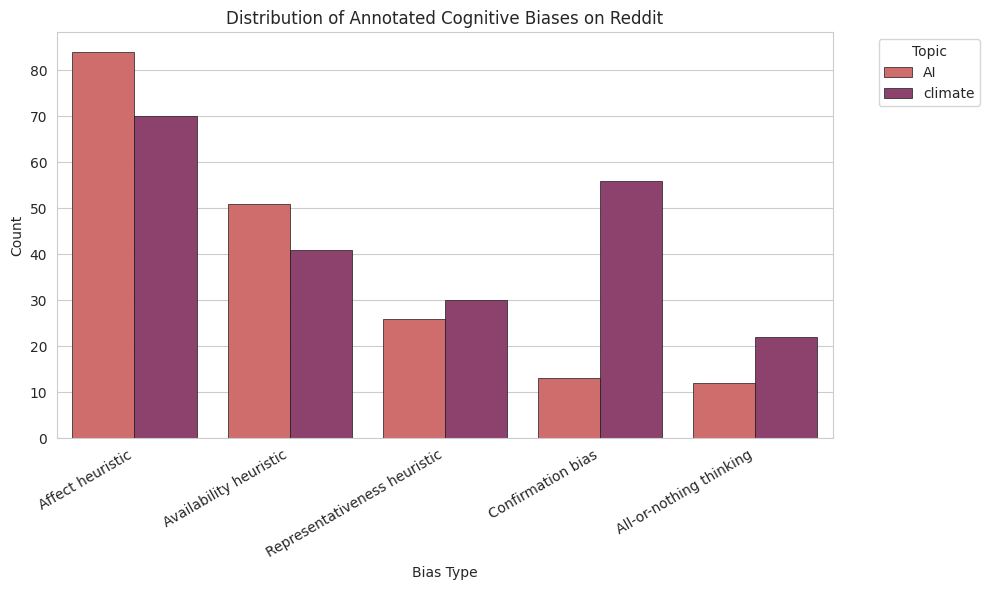

,the bias,annotator initials,topic,count,%
0,affect,bs,AI,5.0,0.134336
1,affect,bs,climate,7.0,0.188071
2,affect,bs,total,12.0,0.322407
3,affect,fs,AI,39.0,1.047824
4,affect,fs,climate,41.0,1.101558
5,affect,fs,total,80.0,2.149382
6,affect,ir,AI,38.0,1.020956
7,affect,ir,climate,18.0,0.483611
8,affect,ir,total,56.0,1.504567
9,affect,lw,AI,2.0,0.053735


In [25]:
descriptive_stats(merged_reddit_whole_r1, "Reddit")

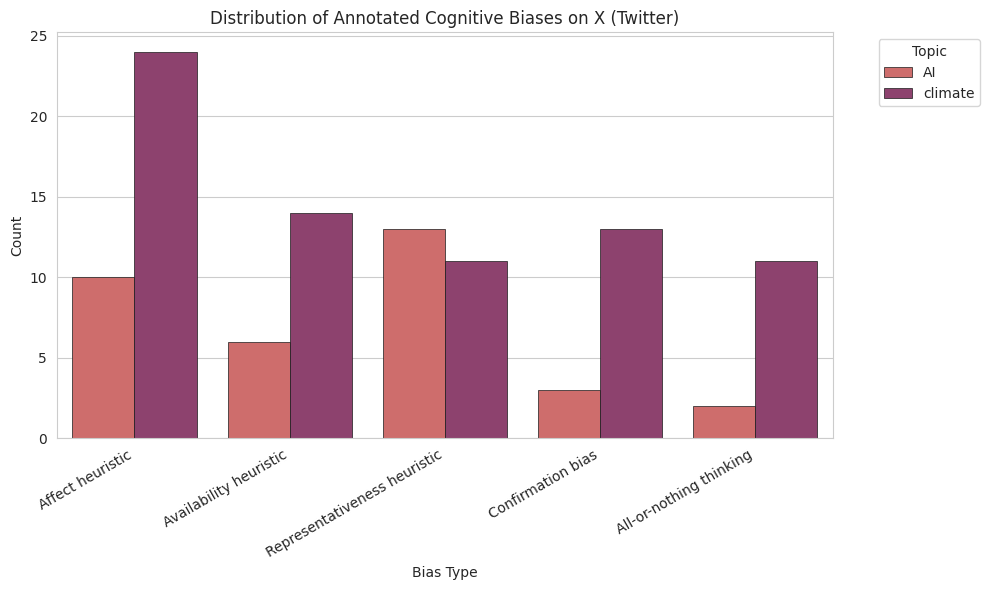

,the bias,annotator initials,topic,count,%
0,affect,bs,climate,1.0,0.057307
1,affect,bs,total,1.0,0.057307
2,affect,fs,AI,1.0,0.057307
3,affect,fs,climate,12.0,0.687679
4,affect,fs,total,13.0,0.744986
5,affect,ir,AI,6.0,0.343840
6,affect,ir,climate,8.0,0.458453
7,affect,ir,total,14.0,0.802292
8,affect,lw,AI,3.0,0.171920
9,affect,lw,climate,3.0,0.171920


In [26]:
descriptive_stats(merged_twitter_whole_r1, "X (Twitter)")

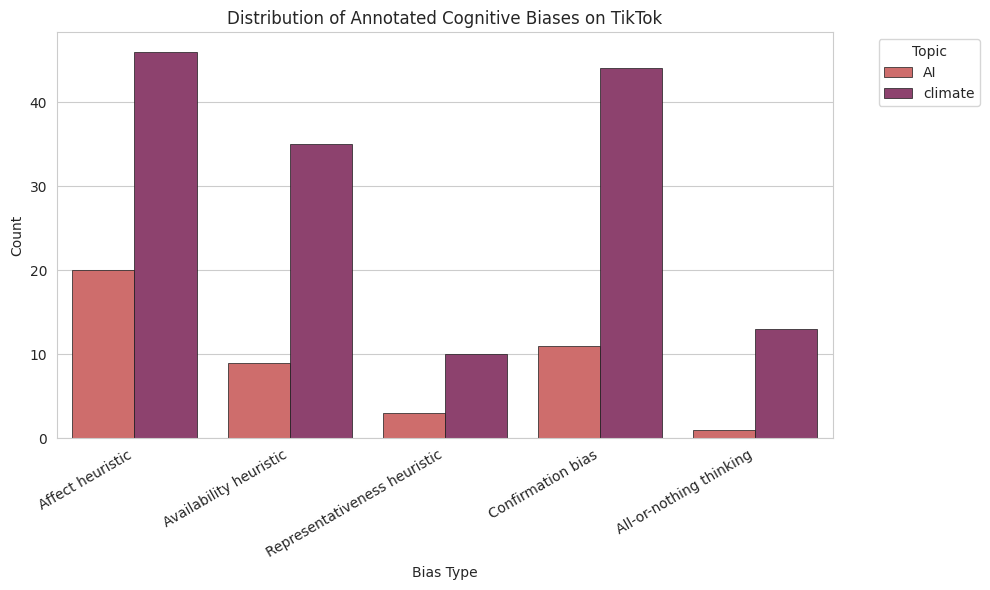

,the bias,annotator initials,topic,count,%
0,affect,bs,AI,1.0,0.107527
1,affect,bs,climate,1.0,0.107527
2,affect,bs,total,2.0,0.215054
3,affect,fs,AI,14.0,1.505376
4,affect,fs,climate,33.0,3.548387
5,affect,fs,total,47.0,5.053763
6,affect,ir,AI,5.0,0.537634
7,affect,ir,climate,8.0,0.860215
8,affect,ir,total,13.0,1.397849
9,affect,lw,climate,4.0,0.430108


In [27]:
descriptive_stats(merged_tiktok_whole_r1, "TikTok")

# Pilot_Agree_All_HAnn - Agreement dataset

## Uploading files

Annotator 1

In [69]:
reddit_bs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Reddit_s1_Annotator_1.xlsx')
reddit_bs = reddit_bs.iloc[np.r_[:180, 600:780], :]

twitter_bs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Twitter_s1_Annotator_1.xlsx')
twitter_bs = twitter_bs.iloc[np.r_[:90, 300:390], :]

In [70]:
tiktok_bs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Tiktok_s1_Annotator_1.xlsx')

Annotator 2

In [71]:
reddit_fs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Reddit_s1_Annotator_2.xlsx')
reddit_fs = reddit_fs.iloc[np.r_[:180, 600:780], :]

twitter_fs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Twitter_s1_Annotator_2.xlsx')
twitter_fs = twitter_fs.iloc[np.r_[:90, 300:390], :]

In [72]:
tiktok_fs = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Tiktok_s1_Annotator_2.xlsx')

Annotator 3

In [73]:
reddit_ir = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Reddit_s1_Annotator_3.xlsx')
reddit_ir = reddit_ir.iloc[np.r_[:180, 600:780], :]

twitter_ir = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Twitter_s1_Annotator_3.xlsx')
twitter_ir = twitter_ir.iloc[np.r_[:90, 300:390], :]

In [74]:
tiktok_ir = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Tiktok_s1_Annotator_3.xlsx')

Annotator 4

In [75]:
reddit_lw = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Reddit_s1_Annotator_4.xlsx')
reddit_lw = reddit_lw.iloc[np.r_[:180, 600:780], :]

twitter_lw = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Twitter_s1_Annotator_4.xlsx')
twitter_lw = twitter_lw.iloc[np.r_[:90, 300:390], :]

In [76]:
tiktok_lw = pd.read_excel('/content/drive/MyDrive/MA thesis/1st round/Tiktok_s1_Annotator_4.xlsx')

## Adding column with topic

In [77]:
reddit = [reddit_bs, reddit_fs, reddit_ir, reddit_lw]
twitter = [twitter_bs, twitter_fs, twitter_ir, twitter_lw]
tiktok = [tiktok_bs, tiktok_fs, tiktok_ir, tiktok_lw]

bias_columns = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']

def add_topic_reddit(df):
  df['topic'] = np.where(df.index < 180, 'climate', 'AI')

def add_topic_twitter(df):
  df['topic'] = np.where(df.index < 90, 'AI', 'climate')

def add_topic_tiktok(df):
  df['topic'] = np.where(df.index < 150, 'climate', 'AI')

for file in reddit:
  add_topic_reddit(file)

for file in twitter:
  add_topic_twitter(file)


for file in tiktok:
  add_topic_tiktok(file)

## Merging files into platform files

In [78]:
annotators = ["bs", "fs", "ir", "lw"]
bias_columns = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']

### Reddit

In [79]:
# Merging Reddit files
def merge_files_with_annotators(dataframes, annotators, bias_columns):
    merged_df = dataframes[0][['title', 'post_id', 'comment_id', 'text', 'topic']].copy()

    for df, annotator in zip(dataframes, annotators):
        annotated_cols = {col: f"{col}_{annotator}" for col in bias_columns}
        annotator_df = df[['title', 'post_id', 'comment_id', 'text', 'topic'] + bias_columns].rename(columns=annotated_cols)
        merged_df = pd.merge(merged_df, annotator_df, on=['title', 'post_id', 'comment_id', 'text', 'topic'], how='outer')

    return merged_df

In [80]:
merged_reddit_r1 = merge_files_with_annotators(reddit, annotators, bias_columns)
merged_reddit_r1

,title,post_id,comment_id,text,topic,affect_h_bs,availability_h_bs,representativeness_h_bs,confirmation_b_bs,all_or_nothing_bs,...,affect_h_ir,availability_h_ir,representativeness_h_ir,confirmation_b_ir,all_or_nothing_ir,affect_h_lw,availability_h_lw,representativeness_h_lw,confirmation_b_lw,all_or_nothing_lw
0,AGI will help to understand ANCESTORS all arou...,1b1gs4z,NaN,Artificial General Intelligence (AGI) has the ...,AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa's Tropical Glaciers Have Shrunk by 90 P...,1b0j95n,NaN,0,climate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa's Tropical Glaciers Have Shrunk by 90 P...,1b0j95n,NaN,0,climate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"As climate change soaks New England, flash flo...",1b0iegx,NaN,0,climate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"As climate change soaks New England, flash flo...",1b0iegx,NaN,0,climate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,NaN,1b1gtlf,ksnjiey,"At this rate we're getting GTA 6, 7 and beyond...",AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,NaN,1b1gtlf,ksoenzr,Yeah one of the first positive things I though...,AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,NaN,1b1gtlf,ksoerds,INB4 this is 4D chess by some combo of the eli...,AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,1b1gtlf,ksph6kr,"So excited! At this rate, I'll never have to i...",AI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Removing all columns to the left from "text"
merged_reddit_r1 = merged_reddit_r1.loc[:, "text":]

In [82]:
# Filling NA values with zeros for annotation columns (excluding "text")
merged_reddit_r1.loc[:, merged_reddit_r1.columns != 'text'] = merged_reddit_r1.loc[:, merged_reddit_r1.columns != 'text'].fillna(0)

In [83]:
annotation_columns = merged_reddit_r1.columns[2:]
merged_reddit_r1[annotation_columns] = merged_reddit_r1[annotation_columns].apply(pd.to_numeric, errors='coerce')

# Annotation counts and percentages
annotation_counts = merged_reddit_r1[annotation_columns].apply(lambda x: (x > 0).sum())
annotation_percentages = (annotation_counts / len(merged_reddit_r1)) * 100

annotation_summary = pd.DataFrame({
    'Annotation Count': annotation_counts,
    'Percentage of Dataset (%)': annotation_percentages
})

In [84]:
annotation_summary

,Annotation Count,Percentage of Dataset (%)
affect_h_bs,5,1.381215
availability_h_bs,1,0.276243
representativeness_h_bs,3,0.828729
confirmation_b_bs,12,3.314917
all_or_nothing_bs,3,0.828729
affect_h_fs,18,4.972376
availability_h_fs,13,3.591160
representativeness_h_fs,2,0.552486
confirmation_b_fs,11,3.038674
all_or_nothing_fs,3,0.828729


### Twitter

In [85]:
# Merging Twitter files
def merge_files_with_annotators(dataframes, annotators, bias_columns):
    merged_df = dataframes[0][['Conversation ID', 'Tweet ID', 'Author ID', 'Created At', 'Text', 'topic']].copy()

    for df, annotator in zip(dataframes, annotators):
        annotated_cols = {col: f"{col}_{annotator}" for col in bias_columns}
        annotator_df = df[['Conversation ID', 'Tweet ID', 'Author ID', 'Created At', 'Text', 'topic'] + bias_columns].rename(columns=annotated_cols)
        merged_df = pd.merge(merged_df, annotator_df, on=['Conversation ID', 'Tweet ID', 'Author ID', 'Created At', 'Text', 'topic'], how='outer')

    return merged_df

In [86]:
merged_twitter_r1 = merge_files_with_annotators(twitter, annotators, bias_columns)
ter_r1 = merged_twitter_r1.loc[:, "Text":]
merged_twitter_r1.loc[:, merged_twitter_r1.columns != 'Text'] = merged_twitter_r1.loc[:, merged_twitter_r1.columns != 'Text'].fillna(0)

annotation_columns = merged_twitter_r1.columns[2:]
merged_twitter_r1[annotation_columns] = merged_twitter_r1[annotation_columns].apply(pd.to_numeric, errors='coerce')

# Annotation counts and percentages
annotation_counts = merged_twitter_r1[annotation_columns].apply(lambda x: (x > 0).sum())
annotation_percentages = (annotation_counts / len(merged_twitter_r1)) * 100

annotation_summary = pd.DataFrame({
    'Annotation Count': annotation_counts,
    'Percentage of Dataset (%)': annotation_percentages
})

annotation_summary

,Annotation Count,Percentage of Dataset (%)
Author ID,0,0.000000
Created At,0,0.000000
Text,0,0.000000
topic,0,0.000000
affect_h_bs,1,0.555556
availability_h_bs,0,0.000000
representativeness_h_bs,1,0.555556
confirmation_b_bs,0,0.000000
all_or_nothing_bs,0,0.000000
affect_h_fs,1,0.555556


### TikTok

In [87]:
# Merging TikTok files
def merge_tiktok_files(dataframes, annotators, bias_columns):
    merged_df = dataframes[0][['id', 'Video URL', 'topic']].copy()

    for df, annotator in zip(dataframes, annotators):
        annotated_cols = {col: f"{col}_{annotator}" for col in bias_columns}
        annotator_df = df[['id', 'Video URL', 'topic'] + bias_columns].rename(columns=annotated_cols)
        merged_df = pd.merge(merged_df, annotator_df, on=['id', 'Video URL', 'topic'], how='outer')

    return merged_df

In [88]:
merged_tiktok_r1 = merge_tiktok_files(tiktok, annotators, bias_columns)
merged_tiktok_r1.loc[:, merged_tiktok_r1.columns != 'id'] = merged_tiktok_r1.loc[:, merged_tiktok_r1.columns != 'id'].fillna(0)

annotation_columns = merged_tiktok_r1.columns[3:]
merged_tiktok_r1[annotation_columns] = merged_tiktok_r1[annotation_columns].apply(pd.to_numeric, errors='coerce')

# Annotation counts and percentages
annotation_counts = merged_tiktok_r1[annotation_columns].apply(lambda x: (x > 0).sum())
annotation_percentages = (annotation_counts / len(merged_tiktok_r1)) * 100

annotation_summary = pd.DataFrame({
    'Annotation Count': annotation_counts,
    'Percentage of Dataset (%)': annotation_percentages
})

annotation_summary

,Annotation Count,Percentage of Dataset (%)
affect_h_bs,2,0.215054
availability_h_bs,2,0.215054
representativeness_h_bs,0,0.000000
confirmation_b_bs,3,0.322581
all_or_nothing_bs,2,0.215054
affect_h_fs,47,5.053763
availability_h_fs,25,2.688172
representativeness_h_fs,3,0.322581
confirmation_b_fs,41,4.408602
all_or_nothing_fs,9,0.967742


### Saving files

In [ ]:
path = '/content/drive/MyDrive/MA thesis/Results/'

In [ ]:
# merged_twitter_r1.to_excel(path + 'merged_twitter_r1.xlsx')
# merged_reddit_r1.to_excel(path + 'merged_reddit_r1.xlsx')
merged_tiktok_r1.to_excel(path + 'merged_tiktok_r1.xlsx')

## Descriptive statistics

In [89]:
path = '/content/drive/MyDrive/MA thesis/Results/Iteration 1/'

In [90]:
merged_reddit_r1 = pd.read_excel(path + 'merged_reddit_r1.xlsx')
merged_twitter_r1 = pd.read_excel(path + 'merged_twitter_r1.xlsx')
merged_tiktok_r1 = pd.read_excel(path + 'merged_tiktok_r1.xlsx')

In [91]:
merged_reddit_r1.describe()

,Unnamed: 0,affect_h_bs,availability_h_bs,representativeness_h_bs,confirmation_b_bs,all_or_nothing_bs,affect_h_fs,availability_h_fs,representativeness_h_fs,confirmation_b_fs,...,affect_h_ir,availability_h_ir,representativeness_h_ir,confirmation_b_ir,all_or_nothing_ir,affect_h_lw,availability_h_lw,representativeness_h_lw,confirmation_b_lw,all_or_nothing_lw
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,...,362.000000,362.000000,362.000000,362.000000,362.00000,362.000000,362.000000,362.0,362.000000,362.000000
mean,180.500000,0.013812,0.002762,0.008287,0.033149,0.008287,0.049724,0.035912,0.005525,0.030387,...,0.033149,0.046961,0.008287,0.008287,0.01105,0.008287,0.005525,0.0,0.002762,0.002762
std,104.644637,0.116872,0.052559,0.090782,0.179274,0.090782,0.217675,0.186327,0.074226,0.171887,...,0.179274,0.211849,0.090782,0.090782,0.10468,0.090782,0.074226,0.0,0.052559,0.052559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
25%,90.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
50%,180.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
75%,270.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
max,361.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0,1.000000,1.000000


In [92]:
def descriptive_stats(df):

    # Extract bias-related columns and sum them up
    bias_columns = [col for col in df.columns if '_h_' in col or '_b_' in col or 'all_or_nothing' in col]
    bias_data = df[bias_columns].sum().reset_index()

    topic_column = 'topic' if 'topic' in df.columns else None

    if topic_column:
        df_melted = df.melt(id_vars=[topic_column], value_vars=bias_columns,
                            var_name='Bias', value_name='Annotation Count')
        df_melted = df_melted[df_melted['Annotation Count'] > 0]

        # Replace abbreviations with full bias names
        bias_mapping = {
            'affect': 'Affect Heuristic',
            'availability': 'Availability Heuristic',
            'representativeness': 'Representativeness Heuristic',
            'confirmation': 'Confirmation Bias',
            'all': 'All-or-Nothing Thinking',
            'all_or_nothing': 'All-or-Nothing Thinking'
        }
        df_melted['Bias Type'] = df_melted['Bias'].str.split('_').str[0].map(bias_mapping)

        # Add a percentage column based on the total dataset size
        total_entries = len(df)
        df_melted['Percentage of Dataset (%)'] = (df_melted['Annotation Count'] / total_entries) * 100

        # Aggregate data by topic and bias type
        aggregated_topic_data = df_melted.groupby([topic_column, 'Bias Type']).sum().reset_index()

        # Add total values
        total_data = aggregated_topic_data.groupby('Bias Type').sum().reset_index()
        total_data[topic_column] = 'Total'
        aggregated_topic_data = pd.concat([aggregated_topic_data, total_data], ignore_index=True)

        # Plot bar charts for each metric using seaborn
        plt.figure(figsize=(16, 8))  # Widen the graph

        # Plot for Percentage of Dataset by Topic

        sns.barplot(
            data=aggregated_topic_data[aggregated_topic_data[topic_column] != 'Total'],
            x='Bias Type', y='Percentage of Dataset (%)', hue=topic_column, edgecolor='black', palette='flare'
        )
        plt.title('Distribution of each bias type by topic (%)', fontsize=14, fontweight='bold')
        plt.xlabel('Bias Type', fontsize=12)
        plt.ylabel('Percentage of Dataset (%)', fontsize=12)
        plt.xticks(rotation=30, fontsize=10)
        plt.ylim(0, 12)
        plt.legend(title='Topic', fontsize=10)

        plt.tight_layout()
        plt.show()

        return aggregated_topic_data

    else:
        print("No topic column found in the dataset.")
        return None

    plt.tight_layout()
    plt.show()

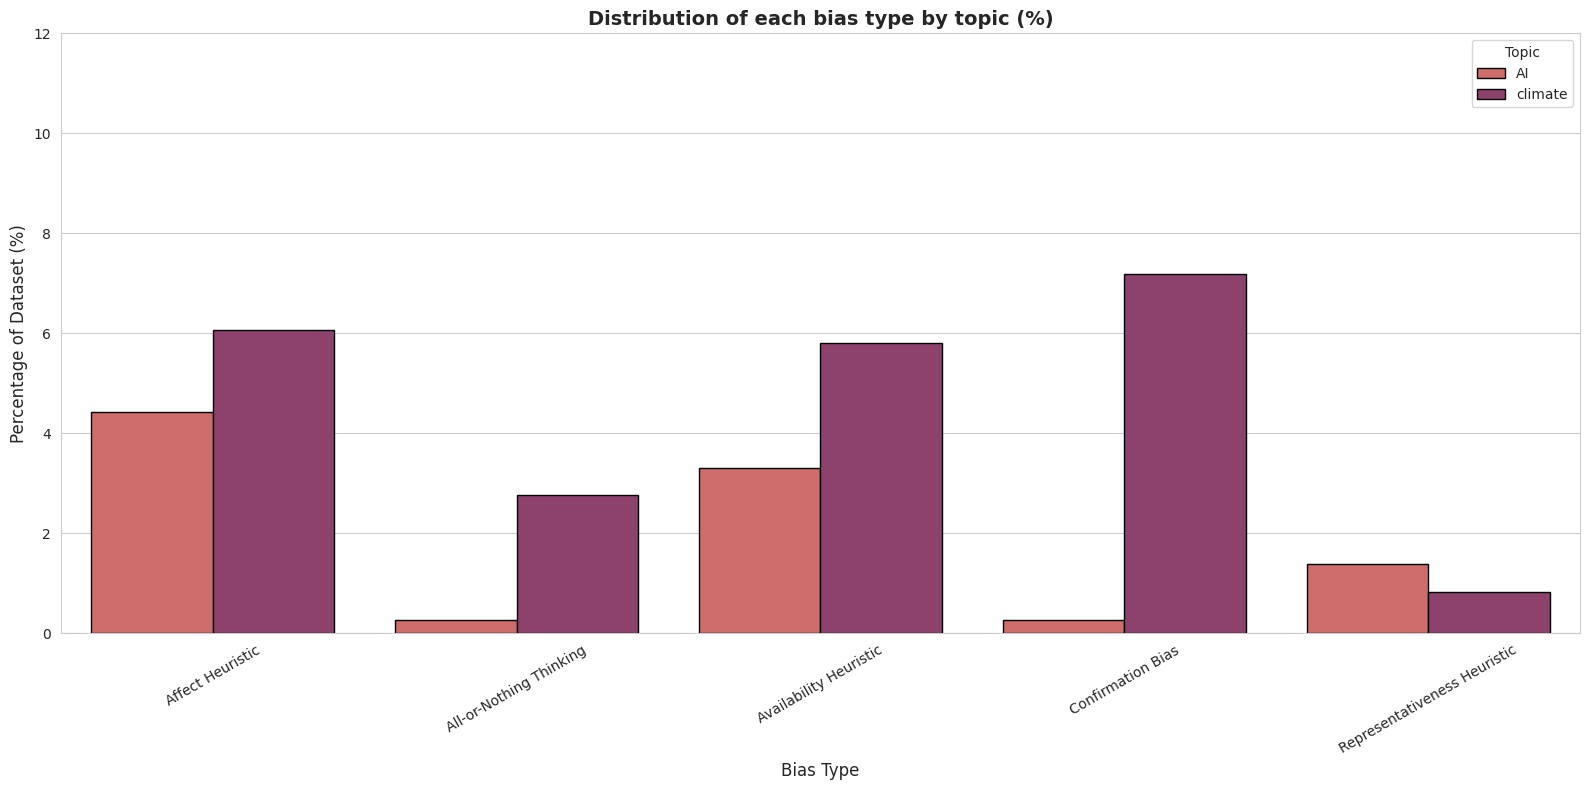

,topic,Bias Type,Bias,Annotation Count,Percentage of Dataset (%)
0,AI,Affect Heuristic,affect_h_bsaffect_h_fsaffect_h_fsaffect_h_fsaf...,16,4.419890
1,AI,All-or-Nothing Thinking,all_or_nothing_ir,1,0.276243
2,AI,Availability Heuristic,availability_h_fsavailability_h_fsavailability...,12,3.314917
3,AI,Confirmation Bias,confirmation_b_fs,1,0.276243
4,AI,Representativeness Heuristic,representativeness_h_bsrepresentativeness_h_bs...,5,1.381215
5,climate,Affect Heuristic,affect_h_bsaffect_h_bsaffect_h_bsaffect_h_bsaf...,22,6.077348
6,climate,All-or-Nothing Thinking,all_or_nothing_bsall_or_nothing_bsall_or_nothi...,10,2.762431
7,climate,Availability Heuristic,availability_h_bsavailability_h_fsavailability...,21,5.801105
8,climate,Confirmation Bias,confirmation_b_bsconfirmation_b_bsconfirmation...,26,7.182320
9,climate,Representativeness Heuristic,representativeness_h_bsrepresentativeness_h_fs...,3,0.828729


In [94]:
descriptive_stats(merged_reddit_r1)

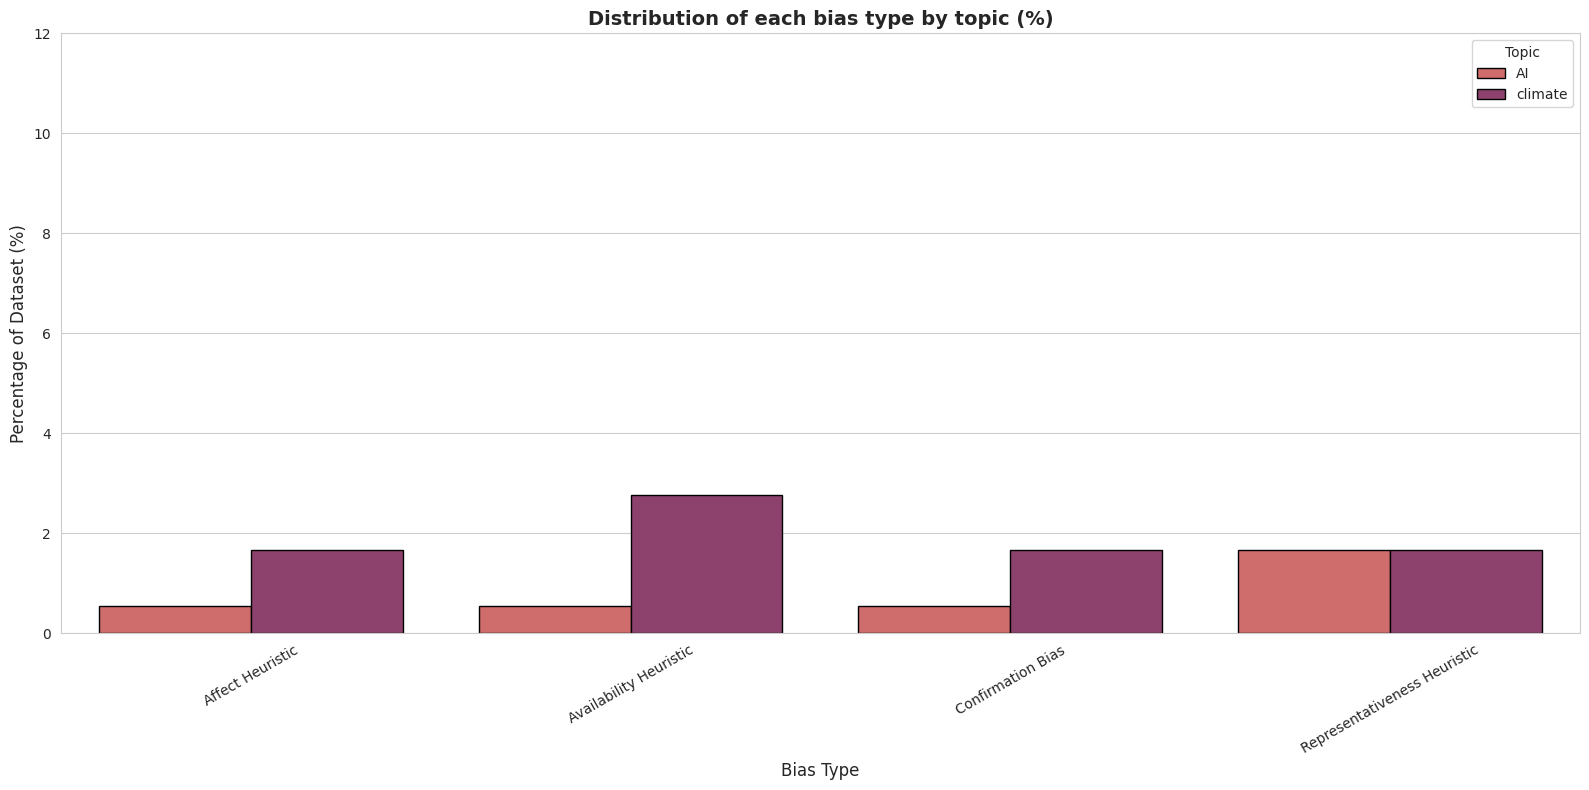

,topic,Bias Type,Bias,Annotation Count,Percentage of Dataset (%)
0,AI,Affect Heuristic,affect_h_ir,1,0.555556
1,AI,Availability Heuristic,availability_h_fs,1,0.555556
2,AI,Confirmation Bias,confirmation_b_fs,1,0.555556
3,AI,Representativeness Heuristic,representativeness_h_bsrepresentativeness_h_fs...,3,1.666667
4,climate,Affect Heuristic,affect_h_bsaffect_h_fsaffect_h_ir,3,1.666667
5,climate,Availability Heuristic,availability_h_iravailability_h_iravailability...,5,2.777778
6,climate,Confirmation Bias,confirmation_b_fsconfirmation_b_fsconfirmation...,3,1.666667
7,climate,Representativeness Heuristic,representativeness_h_fsrepresentativeness_h_fs...,3,1.666667
8,Total,Affect Heuristic,affect_h_iraffect_h_bsaffect_h_fsaffect_h_ir,4,2.222222
9,Total,Availability Heuristic,availability_h_fsavailability_h_iravailability...,6,3.333333


In [95]:
descriptive_stats(merged_twitter_r1)

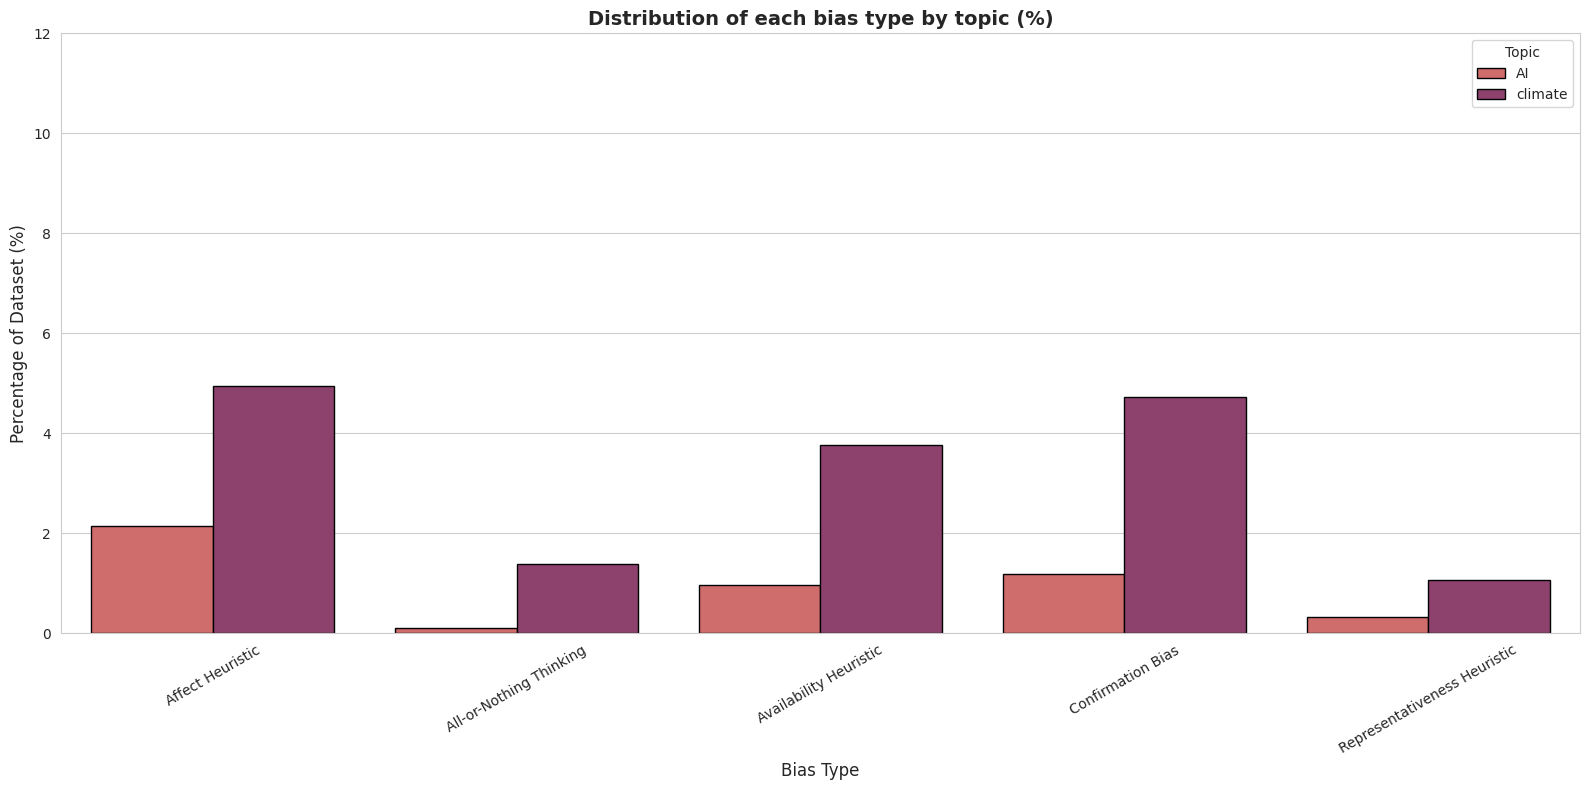

,topic,Bias Type,Bias,Annotation Count,Percentage of Dataset (%)
0,AI,Affect Heuristic,affect_h_bsaffect_h_fsaffect_h_fsaffect_h_fsaf...,20,2.150538
1,AI,All-or-Nothing Thinking,all_or_nothing_bs,1,0.107527
2,AI,Availability Heuristic,availability_h_fsavailability_h_fsavailability...,9,0.967742
3,AI,Confirmation Bias,confirmation_b_fsconfirmation_b_fsconfirmation...,11,1.182796
4,AI,Representativeness Heuristic,representativeness_h_fsrepresentativeness_h_fs...,3,0.322581
5,climate,Affect Heuristic,affect_h_bsaffect_h_fsaffect_h_fsaffect_h_fsaf...,46,4.946237
6,climate,All-or-Nothing Thinking,all_or_nothing_bsall_or_nothing_fsall_or_nothi...,13,1.397849
7,climate,Availability Heuristic,availability_h_bsavailability_h_bsavailability...,35,3.763441
8,climate,Confirmation Bias,confirmation_b_bsconfirmation_b_bsconfirmation...,44,4.731183
9,climate,Representativeness Heuristic,representativeness_h_fsrepresentativeness_h_ir...,10,1.075269


In [97]:
descriptive_stats(merged_tiktok_r1)

In [98]:
# Standardising the text column names for merging
merged_reddit_r1 = merged_reddit_r1.rename(columns={'text': 'Text'})


# Merging the datasets (outer join to include all data)
merged_r1 = pd.concat([merged_reddit_r1, merged_twitter_r1], ignore_index=True)

In [99]:
merged_r1

,Unnamed: 0,Text,topic,affect_h_bs,availability_h_bs,representativeness_h_bs,confirmation_b_bs,all_or_nothing_bs,affect_h_fs,availability_h_fs,...,affect_h_ir,availability_h_ir,representativeness_h_ir,confirmation_b_ir,all_or_nothing_ir,affect_h_lw,availability_h_lw,representativeness_h_lw,confirmation_b_lw,all_or_nothing_lw
0,0,Artificial General Intelligence (AGI) has the ...,AI,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,climate,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,climate,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,climate,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,climate,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,175,@MarkJacob16 Those of us who want to improve t...,climate,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
538,176,"@MarkJacob16 Useless to read NYT, their negati...",climate,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539,177,@MarkJacob16 PSA: Anyone who has a subscriptio...,climate,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540,178,@MarkJacob16 @Nealy_OB Genocide Joe has suppor...,climate,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
merged_r1.to_excel(path + 'merged_r1.xlsx')

## IAA

### Fleiss's Cappa

In [ ]:
from statsmodels.stats.inter_rater import fleiss_kappa

#### For bias presence

In [ ]:
bias_presence_df = merged_r1.copy()
bias_columns = [col for col in bias_presence_df.columns if col not in ['topic']]
bias_presence_df[bias_columns] = bias_presence_df[bias_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Converting each annotation to "1" if any annotation column for an annotator is 1 (indicating bias), else 0
for col in bias_columns:
    bias_presence_df[col] = np.where(bias_presence_df[col] > 0, 1, 0)

bias_counts = bias_presence_df[bias_columns].apply(lambda row: np.bincount(row, minlength=2), axis=1)
bias_counts_df = pd.DataFrame(bias_counts.tolist(), columns=['no_bias', 'bias'])

kappa = fleiss_kappa(bias_counts_df.values, method='fleiss')
print(f"Fleiss' Kappa for bias/no bias agreement: {kappa:.4f}")

Fleiss' Kappa for bias/no bias agreement: -0.0330


#### For each bias

In [ ]:
fleiss_kappa_results = {}

for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']:
    annotator_columns = [f"{bias}_{annotator}" for annotator in ['bs', 'fs', 'ir', 'wl'] if f"{bias}_{annotator}" in bias_presence_df.columns]
    bias_counts = bias_presence_df[annotator_columns].apply(lambda row: np.bincount(row, minlength=2), axis=1)
    bias_counts_df = pd.DataFrame(bias_counts.tolist(), columns=['no_bias', 'bias'])

    kappa = fleiss_kappa(bias_counts_df.values, method='fleiss')
    fleiss_kappa_results[bias] = kappa
    print(f"Fleiss' Kappa for {bias}: {kappa:.4f}")

Fleiss' Kappa for affect_h: 0.0805
Fleiss' Kappa for availability_h: 0.0597
Fleiss' Kappa for representativeness_h: 0.2075
Fleiss' Kappa for confirmation_b: 0.1170
Fleiss' Kappa for all_or_nothing: 0.1950


### Cohen's Kappa

In [ ]:
from statsmodels.stats.inter_rater import fleiss_kappa
from sklearn.metrics import cohen_kappa_score
import itertools

#### For bias presence

In [ ]:
annotators = ['bs', 'fs', 'ir', 'lw']
kappa_results_bias_no_bias = {}

annotator_pairs = list(itertools.combinations(annotators, 2))
for annotator1, annotator2 in annotator_pairs:
    col1 = [f"{bias}_{annotator1}" for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']]
    col2 = [f"{bias}_{annotator2}" for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']]
    combined_col1 = bias_presence_df[col1].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
    combined_col2 = bias_presence_df[col2].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

    kappa = cohen_kappa_score(combined_col1, combined_col2)
    kappa_results_bias_no_bias[(annotator1, annotator2)] = kappa
    print(f"Cohen's Kappa for Bias/No Bias between {annotator1} and {annotator2}: {kappa:.4f}")

Cohen's Kappa for Bias/No Bias between bs and fs: 0.1088
Cohen's Kappa for Bias/No Bias between bs and ir: 0.1407
Cohen's Kappa for Bias/No Bias between bs and lw: 0.0454
Cohen's Kappa for Bias/No Bias between fs and ir: 0.1885
Cohen's Kappa for Bias/No Bias between fs and lw: 0.0845
Cohen's Kappa for Bias/No Bias between ir and lw: 0.0500


#### For each bias

In [ ]:
annotators = ['bs', 'fs', 'ir', 'lw']
kappa_results = {}

for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']:
    annotator_pairs = list(itertools.combinations(annotators, 2))

    kappa_scores = {}
    for annotator1, annotator2 in annotator_pairs:
        col1 = f"{bias}_{annotator1}"
        col2 = f"{bias}_{annotator2}"

        if col1 in merged_r1.columns and col2 in merged_r1.columns:
            kappa = cohen_kappa_score(merged_r1[col1], merged_r1[col2])
            kappa_scores[(annotator1, annotator2)] = kappa
            print(f"Cohen's Kappa for {bias} between {annotator1} and {annotator2}: {kappa:.4f}")

    kappa_results[bias] = kappa_scores

average_kappas = {bias: sum(scores.values()) / len(scores) for bias, scores in kappa_results.items()}
print("\nAverage Cohen's Kappa for each bias category:")
for bias, avg_kappa in average_kappas.items():
    print(f"{bias}: {avg_kappa:.4f}")


Cohen's Kappa for affect_h between bs and fs: -0.0171
Cohen's Kappa for affect_h between bs and ir: -0.0157
Cohen's Kappa for affect_h between bs and lw: 0.2164
Cohen's Kappa for affect_h between fs and ir: 0.2192
Cohen's Kappa for affect_h between fs and lw: 0.0821
Cohen's Kappa for affect_h between ir and lw: -0.0092
Cohen's Kappa for availability_h between bs and fs: -0.0035
Cohen's Kappa for availability_h between bs and ir: 0.0837
Cohen's Kappa for availability_h between bs and lw: -0.0025
Cohen's Kappa for availability_h between fs and ir: 0.0821
Cohen's Kappa for availability_h between fs and lw: 0.1193
Cohen's Kappa for availability_h between ir and lw: 0.0771
Cohen's Kappa for representativeness_h between bs and fs: 0.2158
Cohen's Kappa for representativeness_h between bs and ir: 0.2158
Cohen's Kappa for representativeness_h between bs and lw: 0.0000
Cohen's Kappa for representativeness_h between fs and ir: 0.1926
Cohen's Kappa for representativeness_h between fs and lw: 0.000

### Weighted F1 score

#### For bias presence

In [ ]:
annotators = ['bs', 'fs', 'ir', 'lw']
f1_results_bias_no_bias = {}

annotator_pairs = list(itertools.combinations(annotators, 2))
for annotator1, annotator2 in annotator_pairs:
    col1 = [f"{bias}_{annotator1}" for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']]
    col2 = [f"{bias}_{annotator2}" for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']]

    col1 = [c for c in col1 if c in bias_presence_df.columns]
    col2 = [c for c in col2 if c in bias_presence_df.columns]

    if col1 and col2:
        combined_col1 = bias_presence_df[col1].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
        combined_col2 = bias_presence_df[col2].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

        f1 = f1_score(combined_col1, combined_col2, average='weighted')
        f1_results_bias_no_bias[(annotator1, annotator2)] = f1
        print(f"F1 Score for Bias/No Bias between {annotator1} and {annotator2}: {f1:.4f}")

F1 Score for Bias/No Bias between bs and fs: 0.9042
F1 Score for Bias/No Bias between bs and ir: 0.9084
F1 Score for Bias/No Bias between bs and lw: 0.9323
F1 Score for Bias/No Bias between fs and ir: 0.8647
F1 Score for Bias/No Bias between fs and lw: 0.8724
F1 Score for Bias/No Bias between ir and lw: 0.8700


#### For each bias

In [ ]:
f1_results_per_bias = {}
for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']:
    f1_scores = {}
    for annotator1, annotator2 in annotator_pairs:
        col1 = f"{bias}_{annotator1}"
        col2 = f"{bias}_{annotator2}"

        if col1 in bias_presence_df.columns and col2 in bias_presence_df.columns:
            f1 = f1_score(bias_presence_df[col1], bias_presence_df[col2], average='weighted')
            f1_scores[(annotator1, annotator2)] = f1
            print(f"F1 Score for {bias} between {annotator1} and {annotator2}: {f1:.4f}")

    f1_results_per_bias[bias] = f1_scores

F1 Score for affect_h between bs and fs: 0.9656
F1 Score for affect_h between bs and ir: 0.9703
F1 Score for affect_h between bs and lw: 0.9850
F1 Score for affect_h between fs and ir: 0.9505
F1 Score for affect_h between fs and lw: 0.9500
F1 Score for affect_h between ir and lw: 0.9586
F1 Score for availability_h between bs and fs: 0.9841
F1 Score for availability_h between bs and ir: 0.9786
F1 Score for availability_h between bs and lw: 0.9954
F1 Score for availability_h between fs and ir: 0.9473
F1 Score for availability_h between fs and lw: 0.9646
F1 Score for availability_h between ir and lw: 0.9429
F1 Score for representativeness_h between bs and fs: 0.9878
F1 Score for representativeness_h between bs and ir: 0.9878
F1 Score for representativeness_h between bs and lw: 0.9889
F1 Score for representativeness_h between fs and ir: 0.9852
F1 Score for representativeness_h between fs and lw: 0.9862
F1 Score for representativeness_h between ir and lw: 0.9862
F1 Score for confirmation_b 

### Gwet's AC1

In [ ]:
# 1. Force-reinstall NumPy to get matching C headers
!pip install --upgrade --force-reinstall numpy

# 2. Reinstall irrCAC so it recompiles against that NumPy
!pip install --upgrade --force-reinstall irrCAC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 64.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.12.0 requires numpy<1.29.0,>=1.22.4, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.12.0 which is incompatible.
  Using cached irrcac-0.4.4-py3-none-any.whl.metadata (3.7 kB)
  Using cached coverage-6.5.0-cp311-cp311-manylinux_2_5_x86_

In [ ]:
!pip install irrCAC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 859.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14

In [ ]:
import irrCAC
from irrCAC.datasets import raw_4raters
from irrCAC.raw import CAC

#### For bias presence

In [ ]:
gwet_results_bias_no_bias = {}

bias_no_bias_cols = [
    f"{bias}_{annotator}" for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']
    for annotator in annotators if f"{bias}_{annotator}" in bias_presence_df.columns
]

if len(bias_no_bias_cols) >= 2:
    df_bias_no_bias = bias_presence_df[bias_no_bias_cols].copy()
    df_bias_no_bias.columns = [col.split('_')[-1] for col in bias_no_bias_cols]

    # Calculate Gwet's AC1
    cac_instance = CAC(df_bias_no_bias)
    gwet_result = cac_instance.gwet()
    gwet_results_bias_no_bias['bias_no_bias'] = gwet_result

    print("Gwet's AC1 for Bias/No Bias:")
    print({
        'est': {
            'coefficient_value': gwet_result['est']['coefficient_value'],
            'coefficient_name': gwet_result['est']['coefficient_name'],
            'confidence_interval': gwet_result['est']['confidence_interval'],
            'p_value': gwet_result['est']['p_value'],
            'z': gwet_result['est']['z'],
            'se': gwet_result['est']['se'],
            'pa': gwet_result['est']['pa'],
            'pe': gwet_result['est']['pe']
        },
        'weights': gwet_result['weights'],
        'categories': gwet_result['categories']
    })

Gwet's AC1 for Bias/No Bias:
{'est': {'coefficient_value': 0.97499, 'coefficient_name': 'AC1', 'confidence_interval': (0.97003, 0.97995), 'p_value': 0.0, 'z': 386.25125, 'se': 0.00252, 'pa': 0.97562, 'pe': 0.02496}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}


In [ ]:
gwet_results = {}

# Define annotator pairs explicitly
annotator_pairs = [(annotators[i], annotators[j]) for i in range(len(annotators)) for j in range(i + 1, len(annotators))]

# Iterate through each bias category
for bias in biases:
    pair_results = {}
    for annotator1, annotator2 in annotator_pairs:
        # Construct column names for each annotator's bias column
        col1 = f"{bias}_{annotator1}"
        col2 = f"{bias}_{annotator2}"

        # Check if both columns exist in the dataset
        if col1 in bias_presence_df.columns and col2 in bias_presence_df.columns:
            # Extract the data for the pair of annotators
            pair_df = bias_presence_df[[col1, col2]].copy()
            pair_df.columns = [annotator1, annotator2]  # Rename columns to annotator names

            # Calculate Gwet's AC1 for the current pair
            cac_instance = CAC(pair_df)
            gwet_result = cac_instance.gwet()
            pair_results[(annotator1, annotator2)] = gwet_result

            # Print results for the current pair in the specified format
            print(f"Gwet's AC1 for {bias} between {annotator1} and {annotator2}:")
            print({
                'est': {
                    'coefficient_value': gwet_result['est']['coefficient_value'],
                    'coefficient_name': gwet_result['est']['coefficient_name'],
                    'confidence_interval': gwet_result['est']['confidence_interval'],
                    'p_value': gwet_result['est']['p_value'],
                    'z': gwet_result['est']['z'],
                    'se': gwet_result['est']['se'],
                    'pa': gwet_result['est']['pa'],
                    'pe': gwet_result['est']['pe']
                },
                'weights': gwet_result['weights'],
                'categories': gwet_result['categories']
            })

    # Store results for the current bias
    gwet_results[bias] = pair_results

Gwet's AC1 for affect_h between bs and fs:
{'est': {'coefficient_value': 0.9517, 'coefficient_name': 'AC1', 'confidence_interval': (0.93229, 0.9711), 'p_value': 0.0, 'z': 96.33734, 'se': 0.00988, 'pa': 0.95387, 'pe': 0.04506}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for affect_h between bs and ir:
{'est': {'coefficient_value': 0.96171, 'coefficient_name': 'AC1', 'confidence_interval': (0.94458, 0.97884), 'p_value': 0.0, 'z': 110.29228, 'se': 0.00872, 'pa': 0.9631, 'pe': 0.03622}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for affect_h between bs and lw:
{'est': {'coefficient_value': 0.98687, 'coefficient_name': 'AC1', 'confidence_interval': (0.97705, 0.99669), 'p_value': 0.0, 'z': 197.40047, 'se': 0.005, 'pa': 0.98708, 'pe': 0.01647}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for affect_h between fs and ir:
{'est': {'coefficient_value': 0.95098, 'coefficient_name': 'AC1', 

#### For each bias

In [ ]:
biases = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']

gwet_results = {}


for bias in biases:
    annotator_cols = [f"{bias}_{annotator}" for annotator in annotators if f"{bias}_{annotator}" in bias_presence_df.columns]

    if len(annotator_cols) >= 2:
        df_bias = bias_presence_df[annotator_cols].copy()
        df_bias.columns = [col.split('_')[-1] for col in annotator_cols]

        # Calculate Gwet's AC1
        cac_instance = CAC(df_bias)
        gwet_result = cac_instance.gwet()
        gwet_results[bias] = gwet_result

        print(f"Gwet's AC1 for {bias}:")
        print({
            'est': {
                'coefficient_value': gwet_result['est']['coefficient_value'],
                'coefficient_name': gwet_result['est']['coefficient_name'],
                'confidence_interval': gwet_result['est']['confidence_interval'],
                'p_value': gwet_result['est']['p_value'],
                'z': gwet_result['est']['z'],
                'se': gwet_result['est']['se'],
                'pa': gwet_result['est']['pa'],
                'pe': gwet_result['est']['pe']
            },
            'weights': gwet_result['weights'],
            'categories': gwet_result['categories']
        })

Gwet's AC1 for affect_h:
{'est': {'coefficient_value': 0.96356, 'coefficient_name': 'AC1', 'confidence_interval': (0.95148, 0.97564), 'p_value': 0.0, 'z': 156.62604, 'se': 0.00615, 'pa': 0.96494, 'pe': 0.03799}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for availability_h:
{'est': {'coefficient_value': 0.96589, 'coefficient_name': 'AC1', 'confidence_interval': (0.95427, 0.97751), 'p_value': 0.0, 'z': 163.25425, 'se': 0.00592, 'pa': 0.9671, 'pe': 0.03533}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for representativeness_h:
{'est': {'coefficient_value': 0.98879, 'coefficient_name': 'AC1', 'confidence_interval': (0.98241, 0.99516), 'p_value': 0.0, 'z': 304.6577, 'se': 0.00325, 'pa': 0.98893, 'pe': 0.01283}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for confirmation_b:
{'est': {'coefficient_value': 0.9731, 'coefficient_name': 'AC1', 'confidence_interval': (0.96283, 0.98338), 'p

In [ ]:
gwet_results_pairs_bias_no_bias = {}

annotator_pairs = list(itertools.combinations(annotators, 2))

bias_no_bias_cols = [
    f"{bias}_{annotator}" for bias in biases
    for annotator in annotators if f"{bias}_{annotator}" in bias_presence_df.columns
]

for annotator1, annotator2 in annotator_pairs:

    col1 = [f"{bias}_{annotator1}" for bias in biases if f"{bias}_{annotator1}" in bias_presence_df.columns]
    col2 = [f"{bias}_{annotator2}" for bias in biases if f"{bias}_{annotator2}" in bias_presence_df.columns]

    if col1 and col2:
        combined_col1 = bias_presence_df[col1].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
        combined_col2 = bias_presence_df[col2].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

        df_pair = pd.DataFrame({
            annotator1: combined_col1,
            annotator2: combined_col2
        })

        # Calculate Gwet's AC1 for the pair
        cac_instance = CAC(df_pair)
        gwet_result = cac_instance.gwet()
        gwet_results_pairs_bias_no_bias[(annotator1, annotator2)] = gwet_result

        print(f"Gwet's AC1 for Bias/No Bias between {annotator1} and {annotator2}:")
        print({
            'est': {
                'coefficient_value': gwet_result['est']['coefficient_value'],
                'coefficient_name': gwet_result['est']['coefficient_name'],
                'confidence_interval': gwet_result['est']['confidence_interval'],
                'p_value': gwet_result['est']['p_value'],
                'z': gwet_result['est']['z'],
                'se': gwet_result['est']['se'],
                'pa': gwet_result['est']['pa'],
                'pe': gwet_result['est']['pe']
            },
            'weights': gwet_result['weights'],
            'categories': gwet_result['categories']
        })

Gwet's AC1 for Bias/No Bias between bs and fs:
{'est': {'coefficient_value': 0.67475, 'coefficient_name': 'AC1', 'confidence_interval': (0.64957, 0.69993), 'p_value': 0.0, 'z': 52.54125, 'se': 0.01284, 'pa': 0.75725, 'pe': 0.25367}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for Bias/No Bias between bs and ir:
{'est': {'coefficient_value': 0.81436, 'coefficient_name': 'AC1', 'confidence_interval': (0.79648, 0.83224), 'p_value': 0.0, 'z': 89.29716, 'se': 0.00912, 'pa': 0.84528, 'pe': 0.16658}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for Bias/No Bias between bs and wl:
{'est': {'coefficient_value': 0.94458, 'coefficient_name': 'AC1', 'confidence_interval': (0.93567, 0.95349), 'p_value': 0.0, 'z': 207.83756, 'se': 0.00454, 'pa': 0.94798, 'pe': 0.06135}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for Bias/No Bias between fs and ir:
{'est': {'coefficient_value': 0.61175, 'coeffi